In [ ]:
import os
os.makedirs("Assignment1/student_performance/data", exist_ok=True)
os.makedirs("Assignment1/student_performance/figures", exist_ok=True)
os.makedirs("Assignment1/student_performance/reports", exist_ok=True)
print("Folders ready:", os.listdir("Assignment1/student_performance"))

Folders ready: ['reports', 'figures', 'data']


In [ ]:
data_path = "Assignment1/student_performance/data/StudentsPerformance.csv"

# Try to download automatically (may fail if Box link blocks direct download)
try:
    # direct download attempt (may not work). Replace url if you have direct CSV link.
    !wget -O "{data_path}" "https://app.box.com/shared/static/ji910ez3ycw137rw07xnhielxey7ww41.csv" -q
    if not os.path.exists(data_path) or os.path.getsize(data_path) < 100:
        raise Exception("auto-download likely failed or file too small")
    print("Downloaded dataset to", data_path)
except Exception as e:
    print("Automatic download failed or not available. Please upload StudentsPerformance.csv from your computer.")
    from google.colab import files
    uploaded = files.upload()
    # move uploaded file to expected path
    for fn in uploaded.keys():
        os.rename(fn, data_path)
    print("Uploaded and saved to", data_path)

Automatic download failed or not available. Please upload StudentsPerformance.csv from your computer.


Saving StudentsPerformance.csv to StudentsPerformance.csv
Uploaded and saved to Assignment1/student_performance/data/StudentsPerformance.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(data_path)
# standardize column names
df.columns = [c.strip() for c in df.columns]

# impute numeric if any missing
score_cols = ["math score","reading score","writing score"]
for c in score_cols:
    if df[c].isnull().sum() > 0:
        df[c].fillna(df[c].median(), inplace=True)

# categorical fill
for c in ["gender","race/ethnicity","parental level of education","lunch","test preparation course"]:
    if c in df.columns:
        df[c].fillna("Unknown", inplace=True)

# overall average
df["overall_avg"] = df[score_cols].mean(axis=1)
df.head()

/tmp/ipython-input-2364692931.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna("Unknown", inplace=True)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall_avg
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


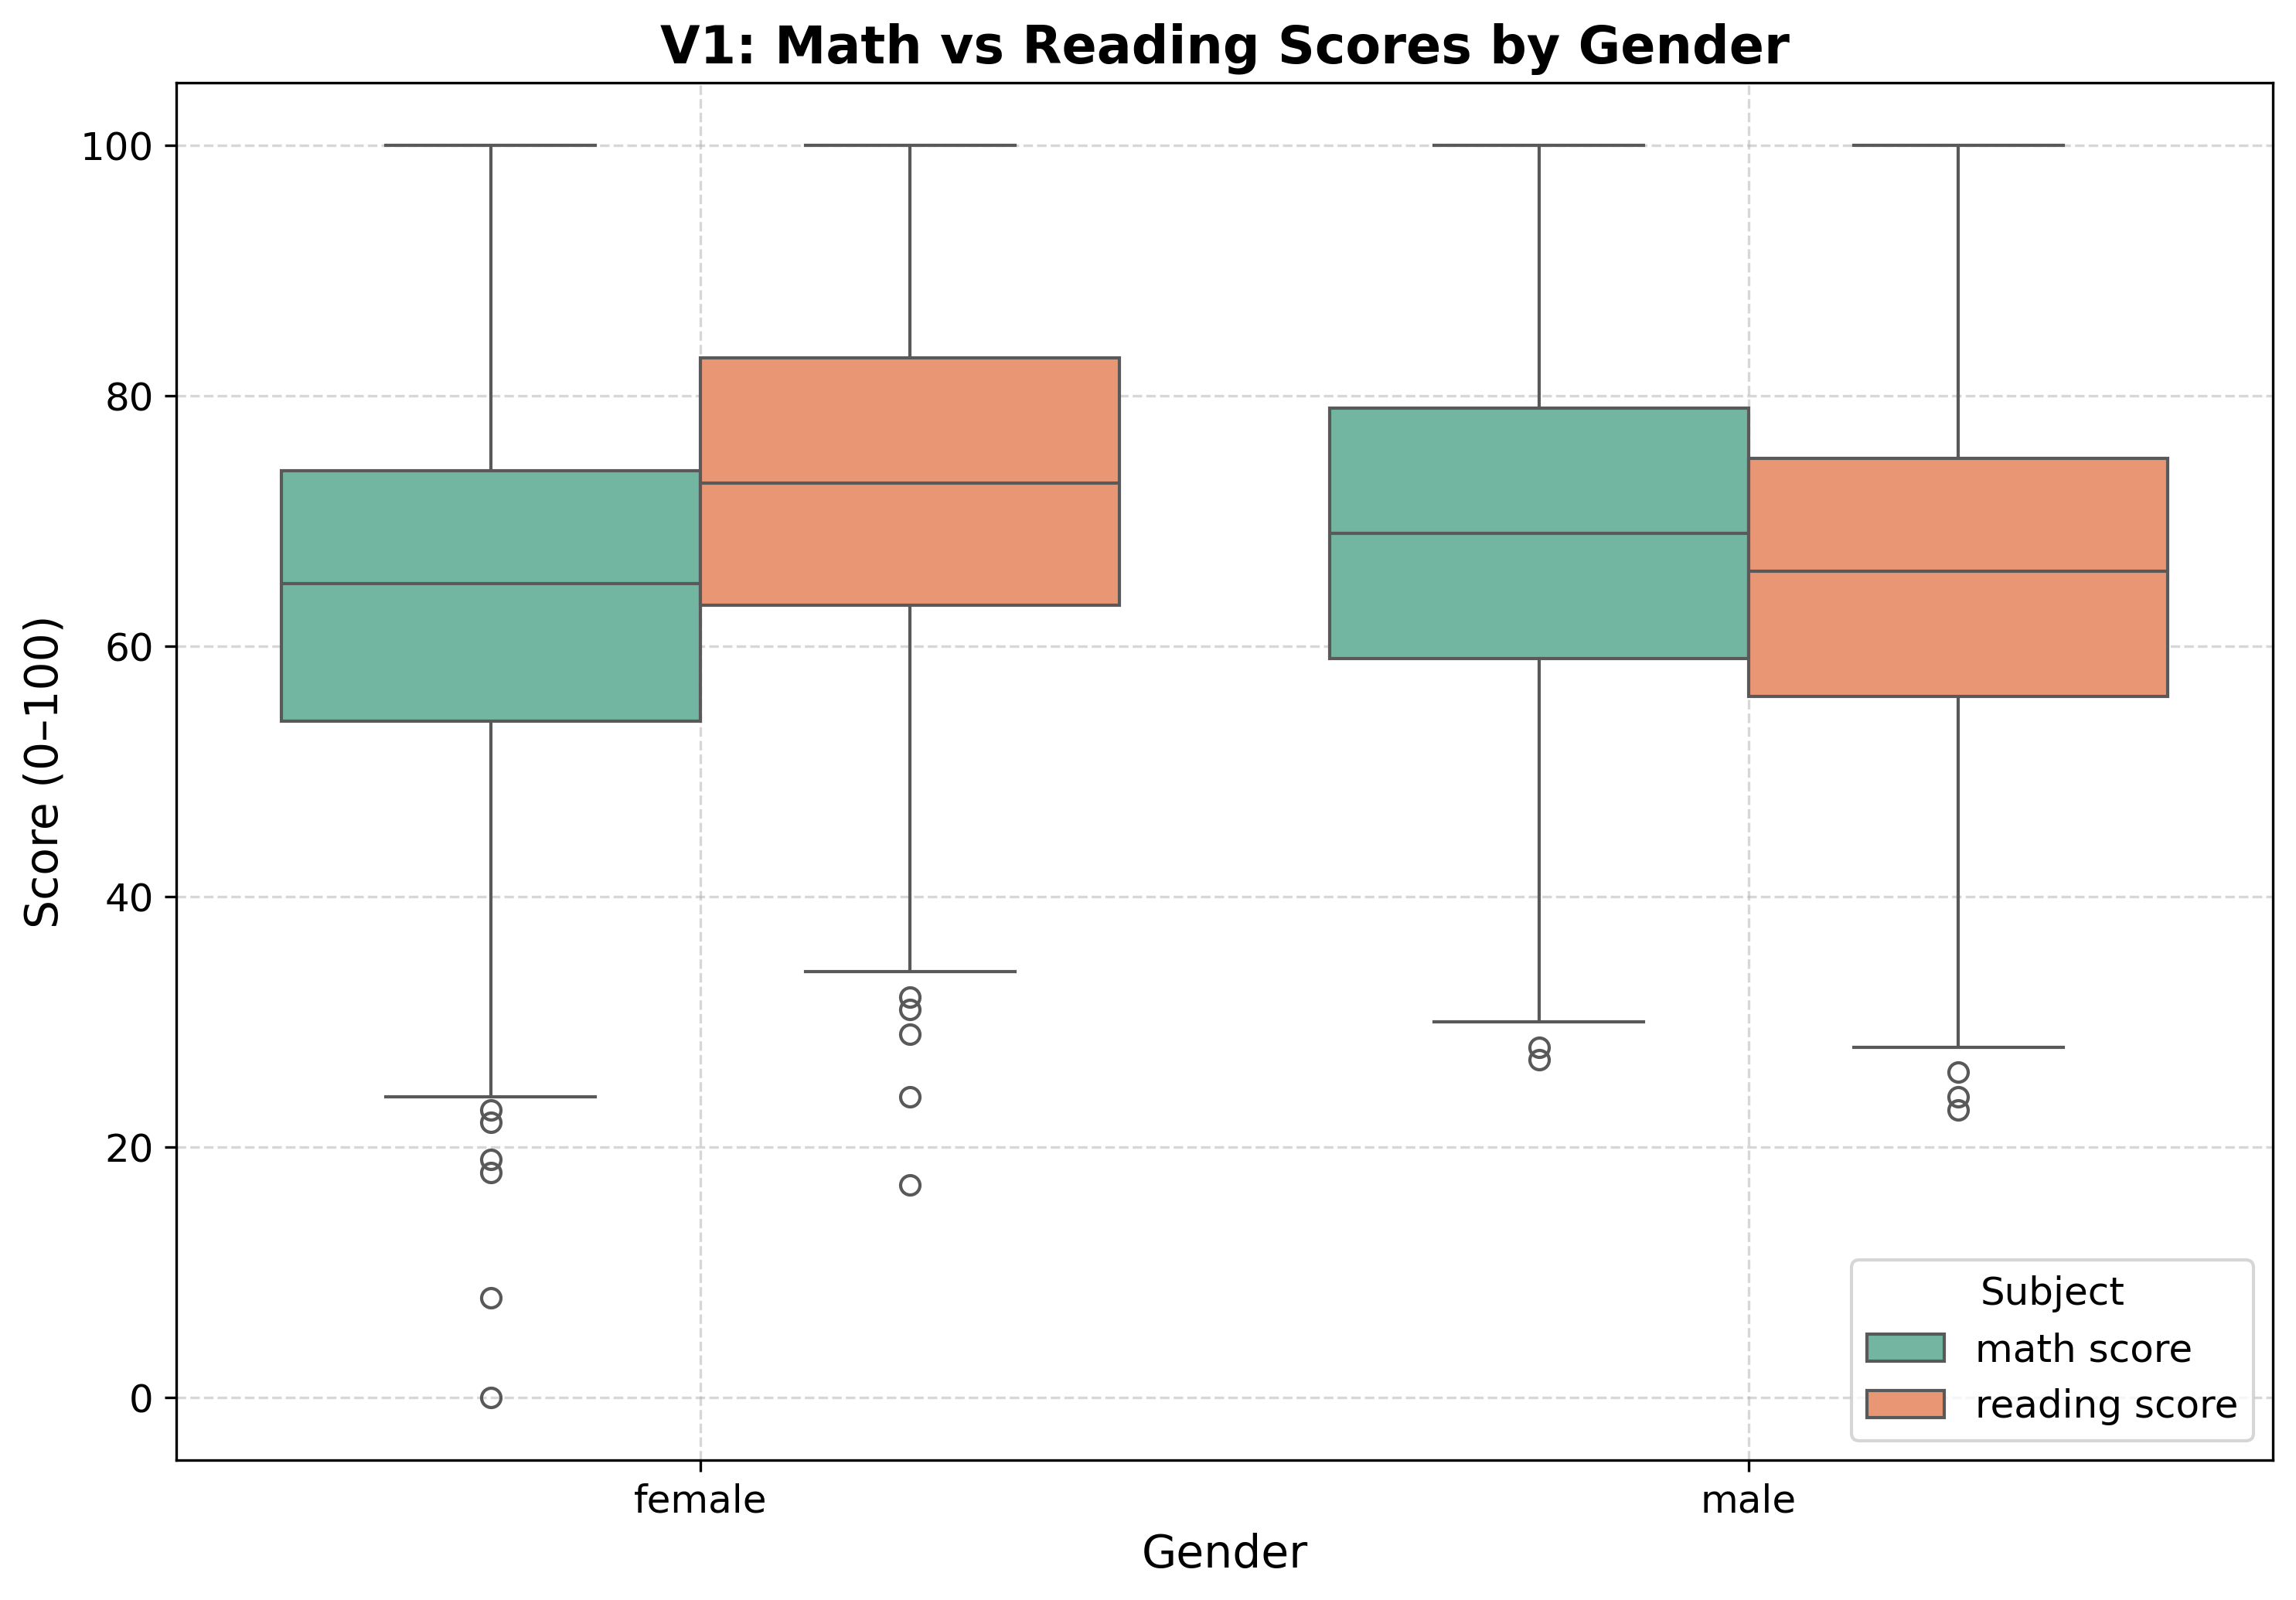

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,7), dpi=300)
df_long = df.melt(id_vars=["gender"], value_vars=["math score","reading score"],
                  var_name="subject", value_name="score")

sns.boxplot(x="gender", y="score", hue="subject", data=df_long, palette="Set2", ax=ax)
ax.set_title("V1: Math vs Reading Scores by Gender", fontsize=16, weight='bold')
ax.set_xlabel("Gender", fontsize=14)
ax.set_ylabel("Score (0–100)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.legend(title="Subject", fontsize=12, title_fontsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("Assignment1/student_performance/figures/V1_gender_boxplots.png", dpi=300)
plt.show()

/tmp/ipython-input-1380682678.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="test preparation course", y="math score", data=df,


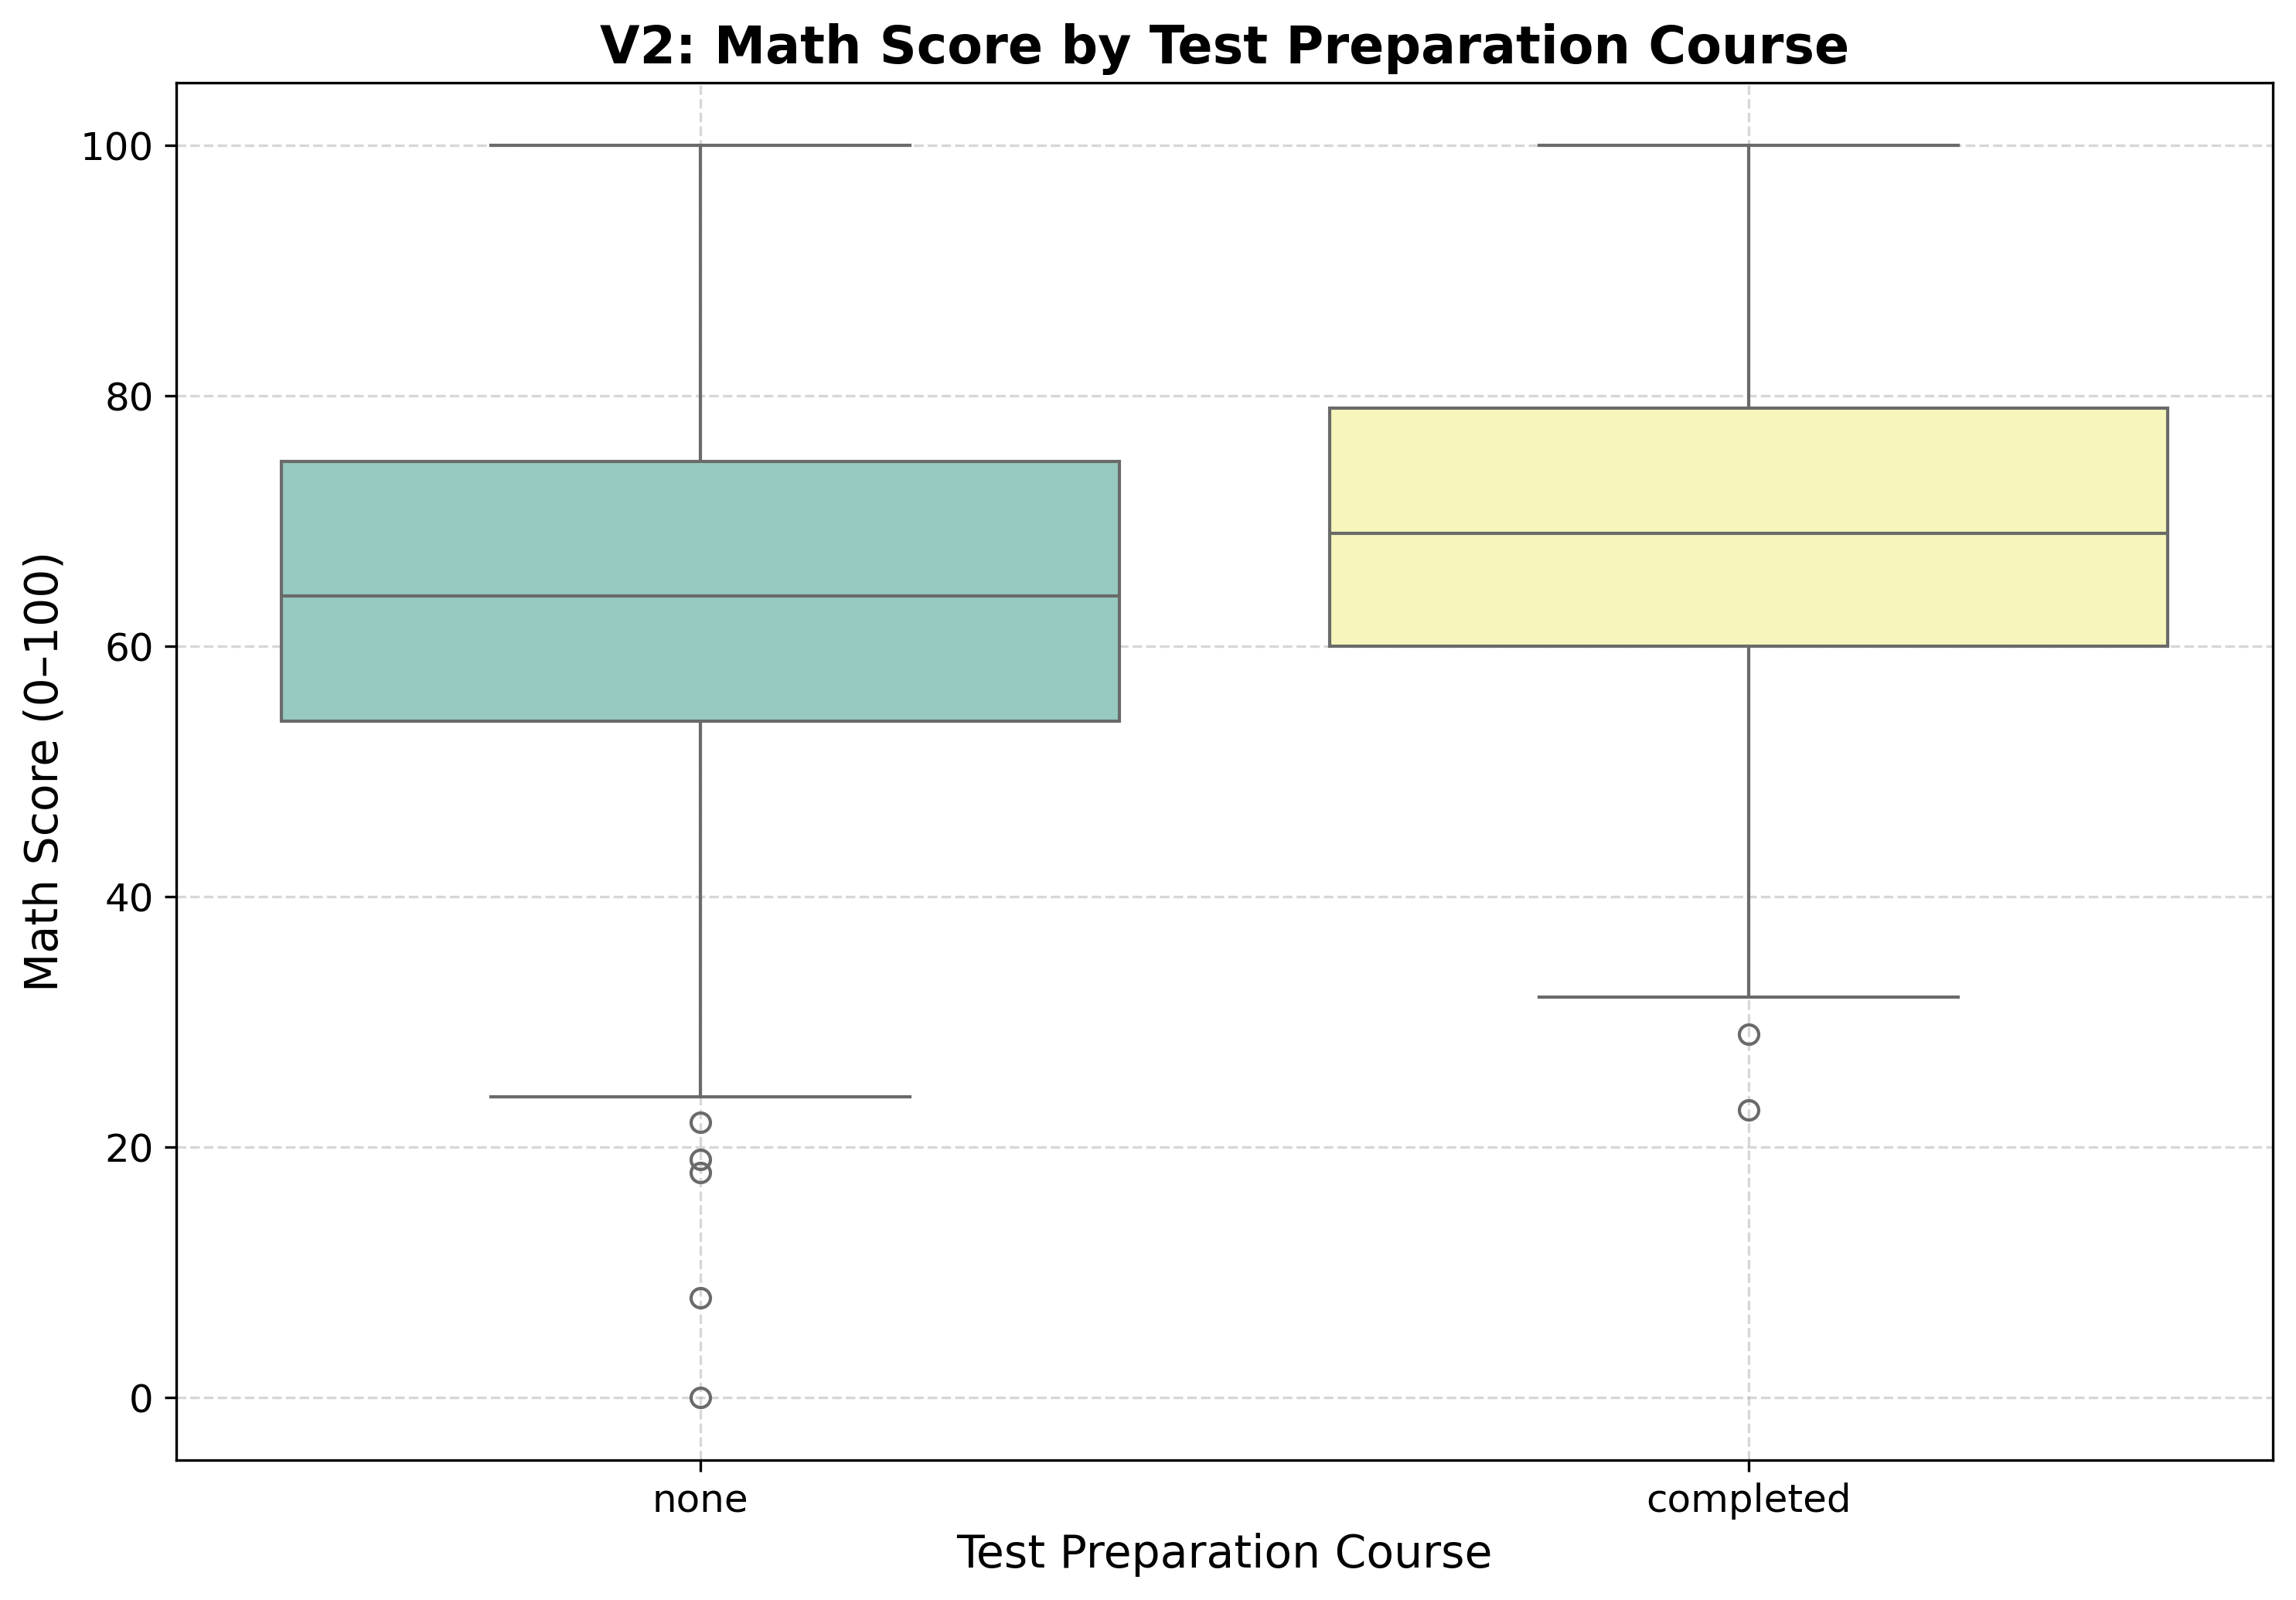

In [ ]:
fig, ax = plt.subplots(figsize=(10,7), dpi=300)
sns.boxplot(x="test preparation course", y="math score", data=df,
            palette="Set3", ax=ax)
ax.set_title("V2: Math Score by Test Preparation Course", fontsize=16, weight='bold')
ax.set_xlabel("Test Preparation Course", fontsize=14)
ax.set_ylabel("Math Score (0–100)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.savefig("Assignment1/student_performance/figures/V2_testprep_math.png", dpi=300)
plt.show()

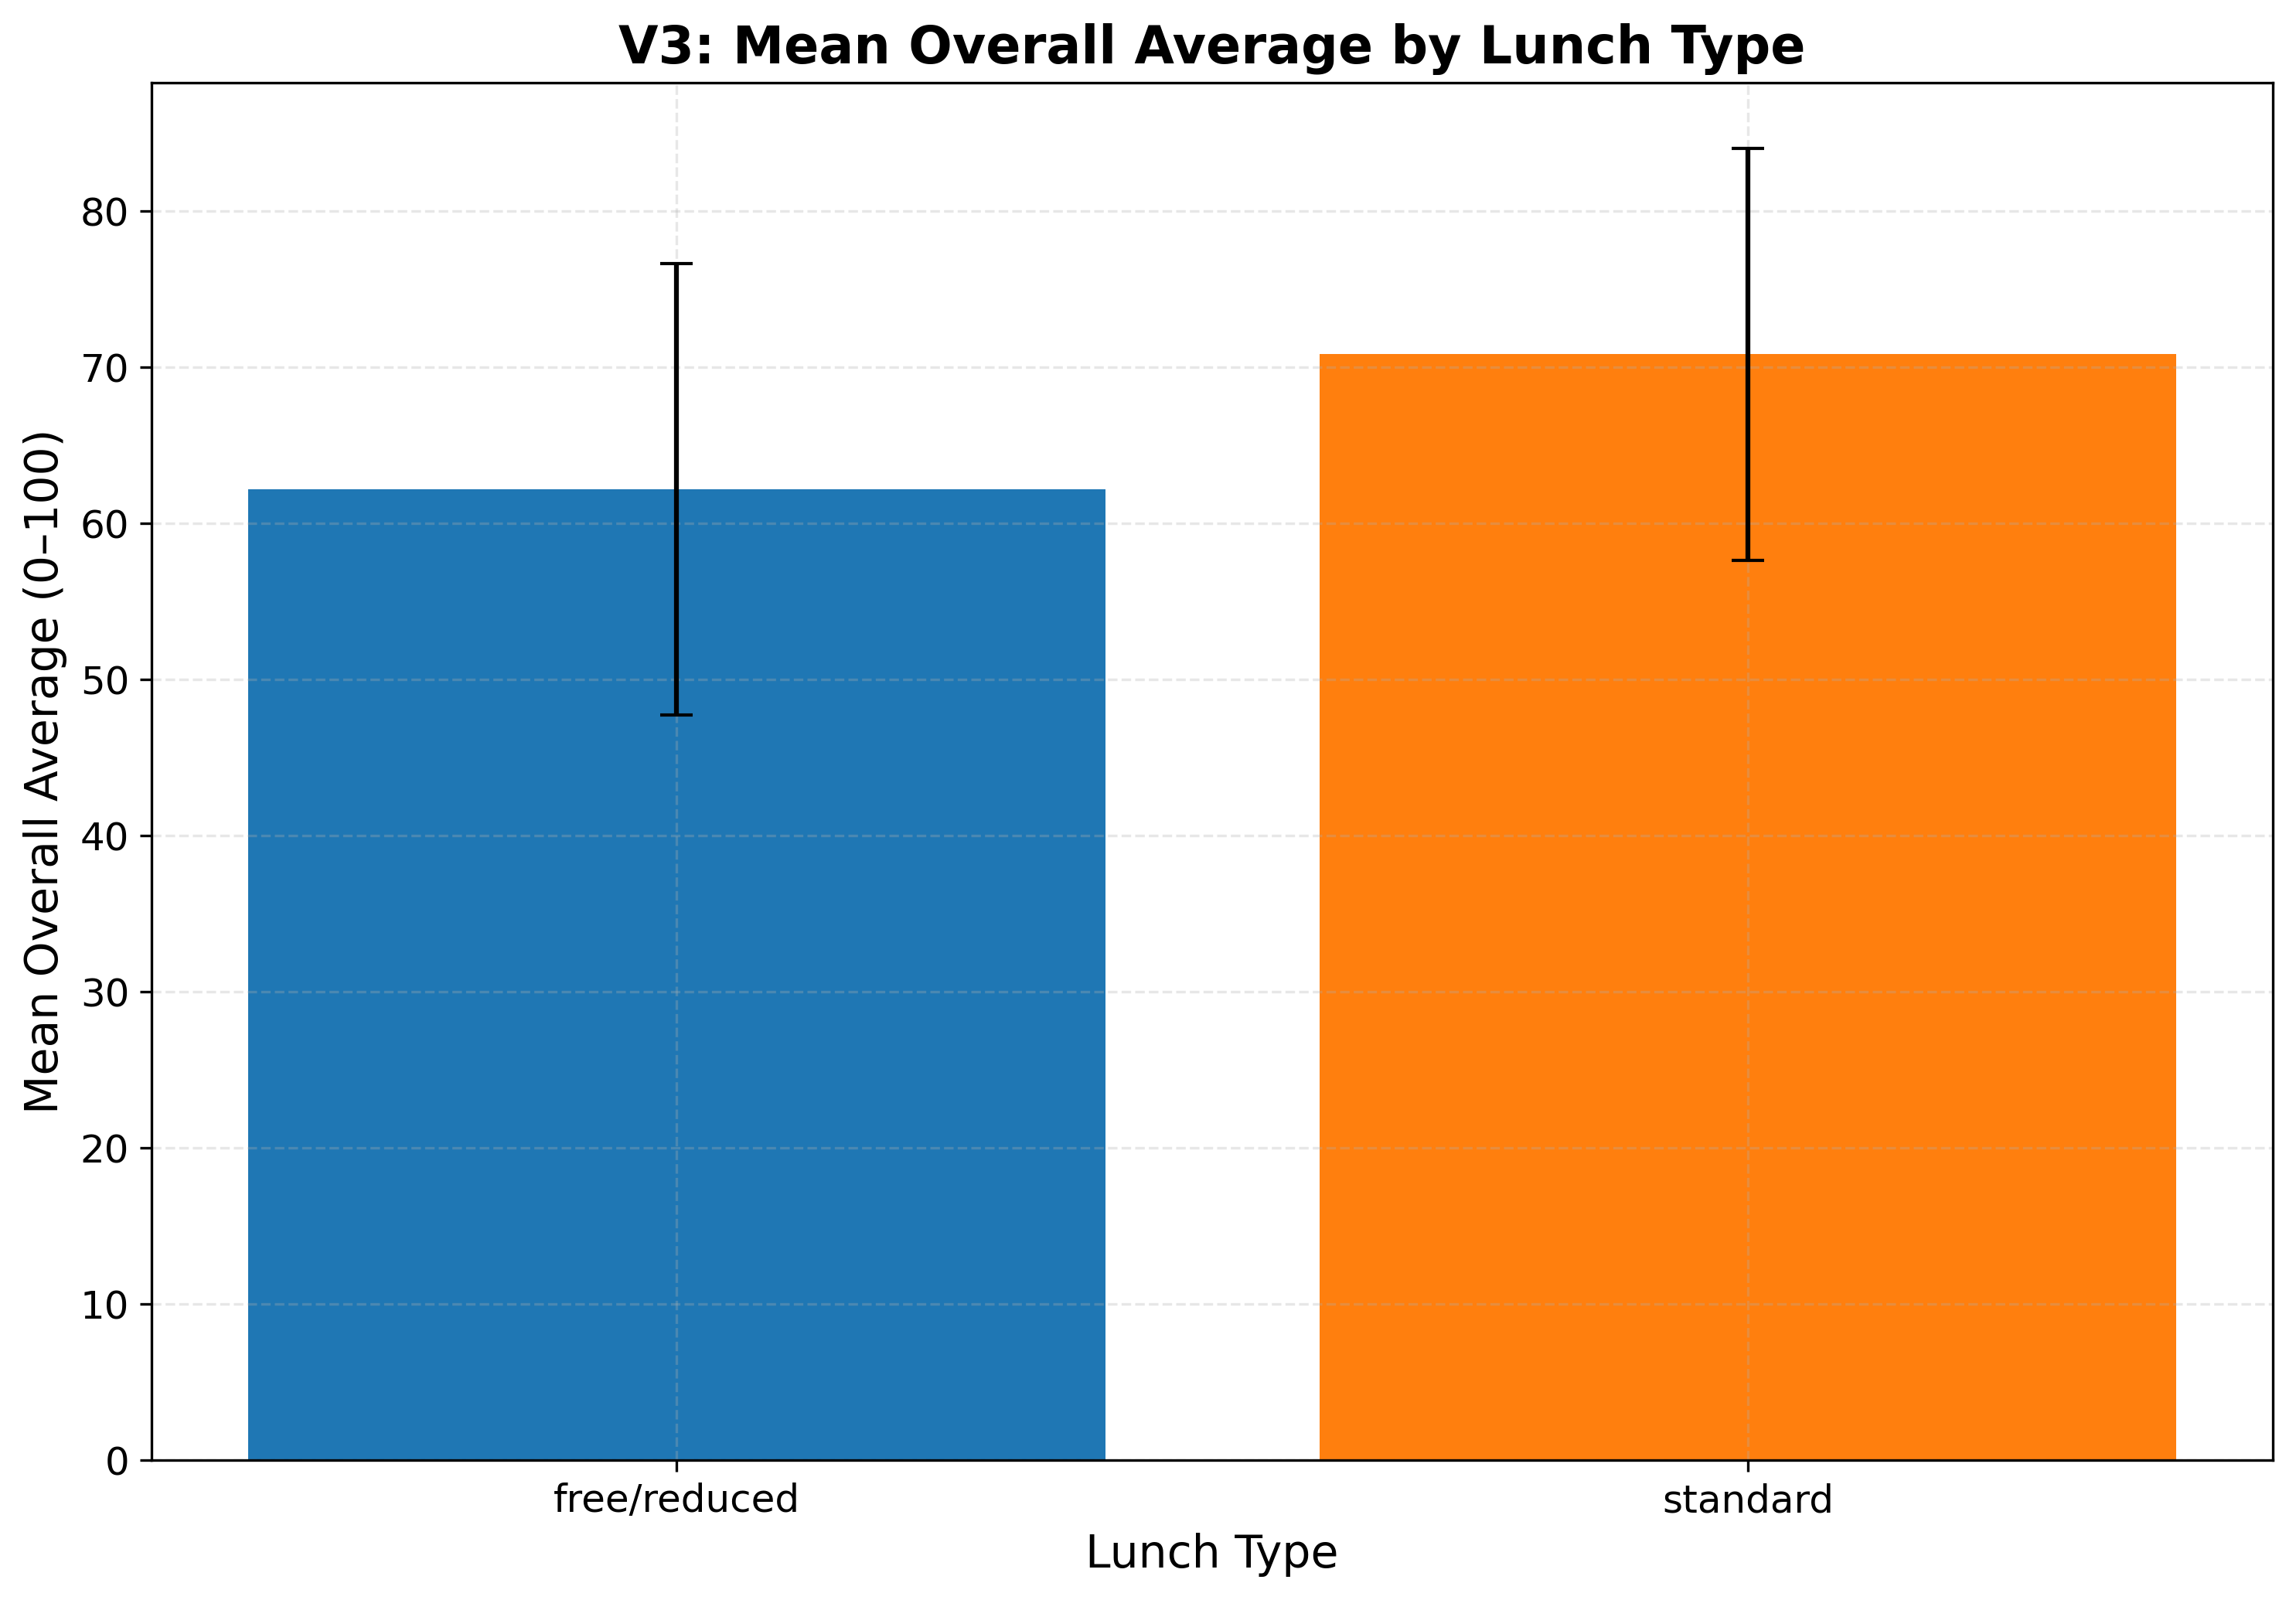

In [ ]:
fig, ax = plt.subplots(figsize=(10,7), dpi=300)
grouped = df.groupby("lunch")["overall_avg"].agg(["mean","std"]).reset_index()
ax.bar(grouped["lunch"], grouped["mean"], yerr=grouped["std"], capsize=5, color=['#1f77b4','#ff7f0e'])
ax.set_title("V3: Mean Overall Average by Lunch Type", fontsize=16, weight='bold')
ax.set_xlabel("Lunch Type", fontsize=14)
ax.set_ylabel("Mean Overall Average (0–100)", fontsize=14)
ax.tick_params(axis='both', labelsize=12)
ax.grid(True, linestyle='--', alpha=0.3)

plt.tight_layout()
plt.savefig("Assignment1/student_performance/figures/V3_lunch_overallavg.png", dpi=300)
plt.show()

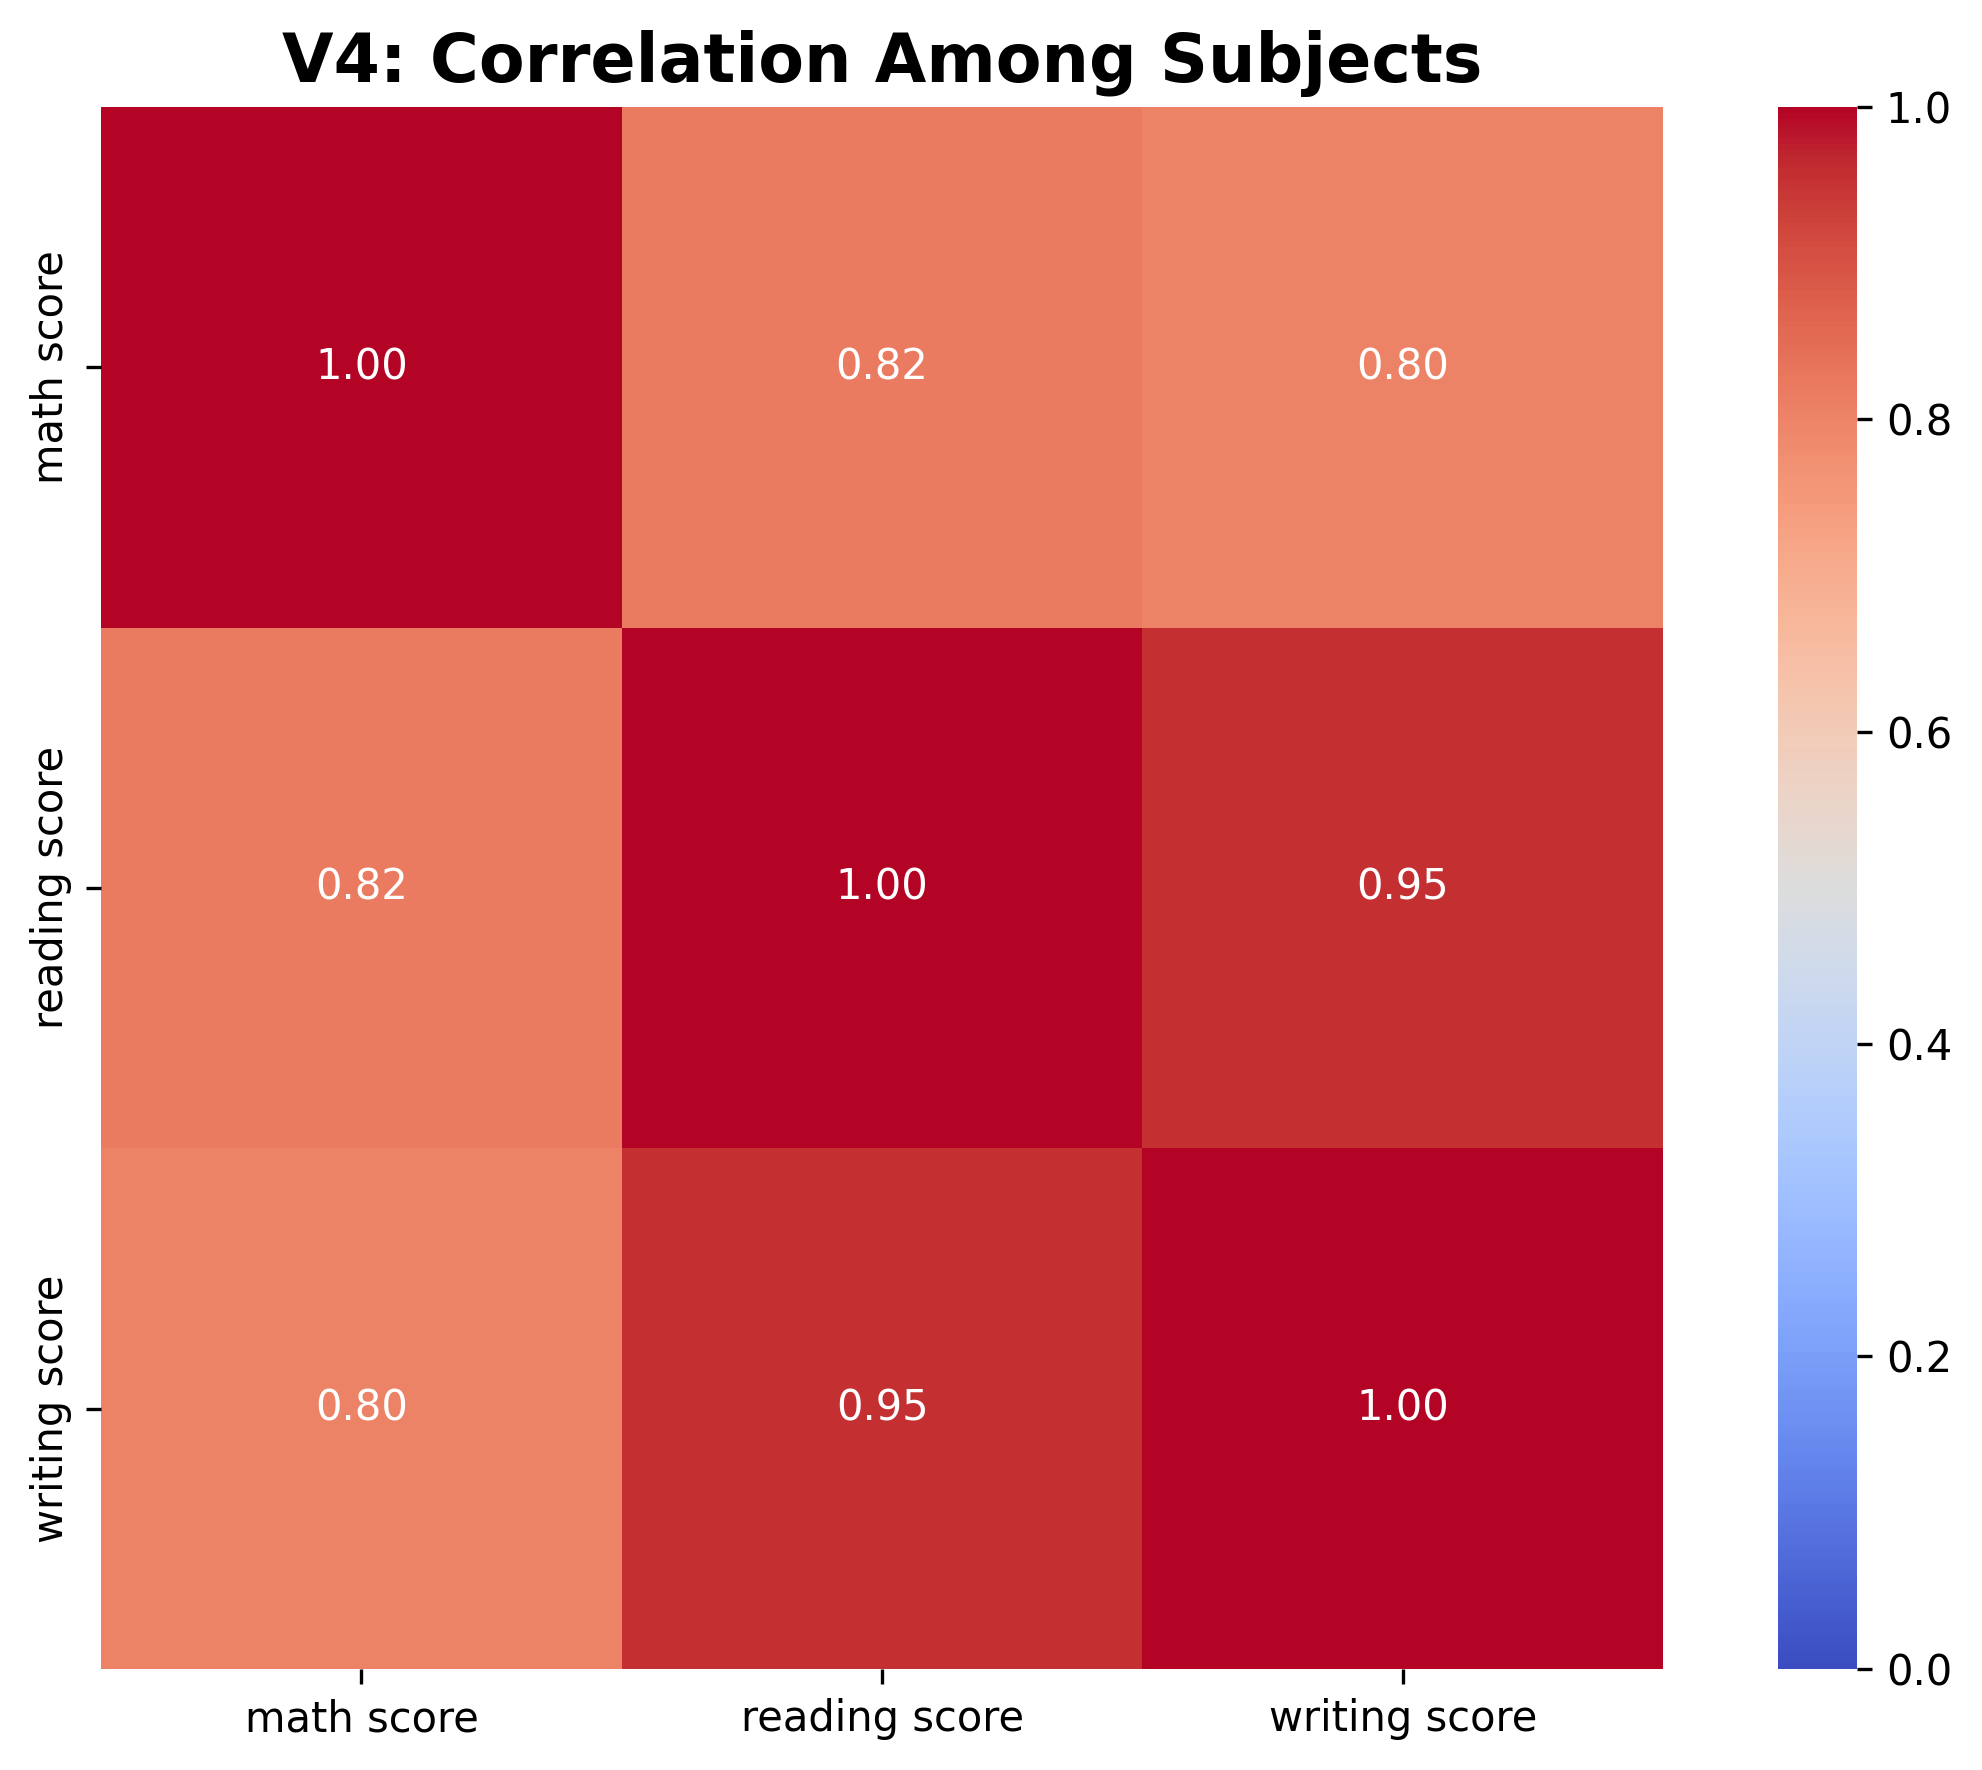

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=300)
corr = df[["math score","reading score","writing score"]].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=0, vmax=1, square=True, ax=ax)
ax.set_title("V4: Correlation Among Subjects", fontsize=16, weight='bold')
plt.tight_layout()
plt.savefig("Assignment1/student_performance/figures/V4_subject_correlations.png", dpi=300)
plt.show()

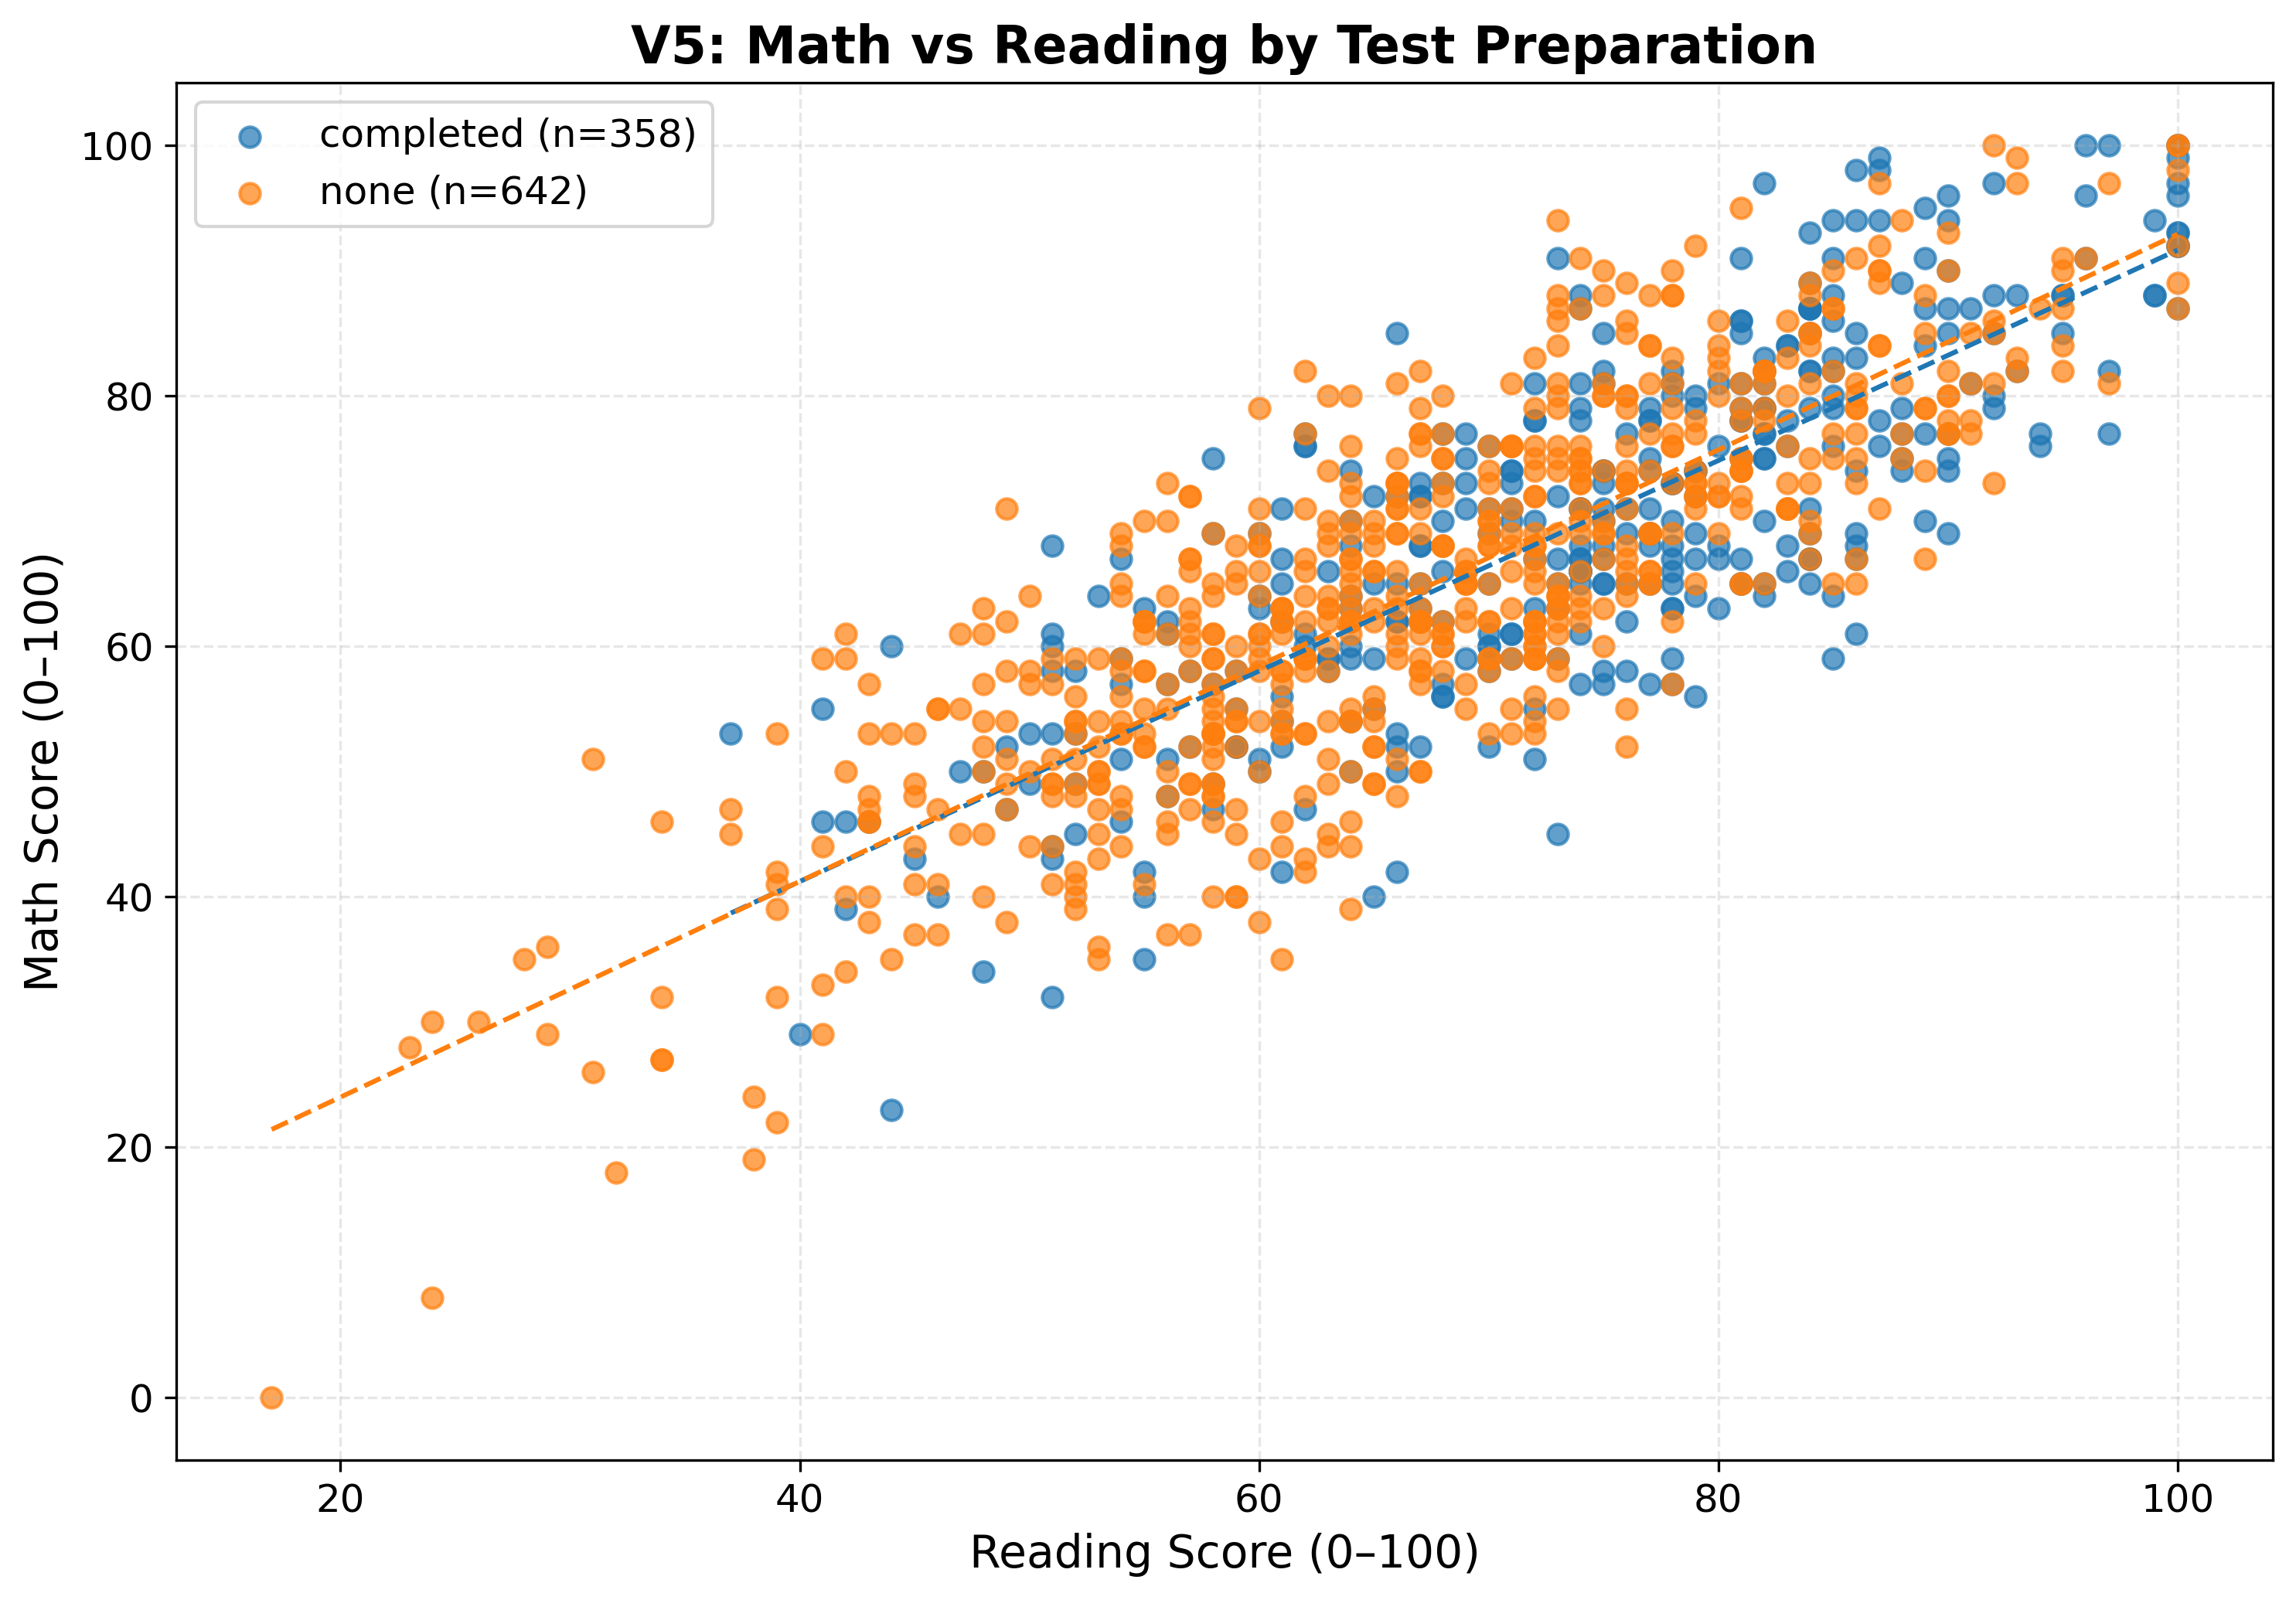

In [ ]:
fig, ax = plt.subplots(figsize=(10,7), dpi=300)
groups = df.groupby("test preparation course")
colors = {"completed":"tab:blue", "none":"tab:orange"}
for name, group in groups:
    x = group["reading score"]
    y = group["math score"]
    ax.scatter(x, y, label=f"{name} (n={len(group)})", color=colors[name], s=40, alpha=0.7)
    # best-fit line
    if len(group) > 1:
        m, b = np.polyfit(x, y, 1)
        xs = np.array([x.min(), x.max()])
        ax.plot(xs, m*xs+b, color=colors[name], linestyle="--")

ax.set_xlabel("Reading Score (0–100)", fontsize=14)
ax.set_ylabel("Math Score (0–100)", fontsize=14)
ax.set_title("V5: Math vs Reading by Test Preparation", fontsize=16, weight='bold')
ax.tick_params(axis='both', labelsize=12)
ax.legend(fontsize=12)
ax.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.savefig("Assignment1/student_performance/figures/V5_math_vs_reading_trendlines.png", dpi=300)
plt.show()

Preprocessing:
I first loaded the student performance dataset and made sure there were no missing values. I also cleaned up the categorical data so it was ready for analysis.
Visualizations & Insights:
Gender vs Scores: Boxplots show that there are small differences in math and reading scores between boys and girls.
Test Prep Impact: Students who completed the test prep course tended to score better in math.
Lunch Type: Those with a standard lunch generally had slightly higher overall scores compared to free/reduced lunch.
Subject Correlations: Math, reading, and writing scores move together, meaning students strong in one subject often do well in the others.
Math vs Reading Trends: Math and reading are positively related, and students who completed test prep showed a slightly stronger improvement in math relative to reading.
Summary:
All the visualizations are labeled and clear, and they help tell the story of how gender, test preparation, and lunch type relate to student performance.

In [ ]:
!zip -r Assignment1_student_performance.zip Assignment1/student_performance
print("Zipped to Assignment1_student_performance.zip. Download from Files pane or use Files -> Download.")

updating: Assignment1/student_performance/ (stored 0%)
updating: Assignment1/student_performance/reports/ (stored 0%)
updating: Assignment1/student_performance/figures/ (stored 0%)
updating: Assignment1/student_performance/figures/V4_subject_correlations.png (deflated 20%)
updating: Assignment1/student_performance/figures/V3_lunch_overallavg.png (deflated 29%)
updating: Assignment1/student_performance/figures/V5_math_vs_reading_trendlines.png (deflated 8%)
updating: Assignment1/student_performance/figures/V1_gender_boxplots.png (deflated 28%)
updating: Assignment1/student_performance/figures/V2_testprep_math.png (deflated 29%)
updating: Assignment1/student_performance/data/ (stored 0%)
updating: Assignment1/student_performance/data/StudentsPerformance.csv (deflated 89%)
Zipped to Assignment1_student_performance.zip. Download from Files pane or use Files -> Download.
